In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier as ADC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression as LR
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import BallTree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV as GSearch

from imblearn.under_sampling import RandomUnderSampler 

In [3]:
airline_df = pd.read_csv('./data/airline_data.csv')
airline_df.dropna(inplace=True)
airline_df.reset_index(drop=True, inplace=True)
airline_df = pd.get_dummies(airline_df, prefix = None, prefix_sep = '_', dummy_na = False, columns = ['satisfaction','Gender', 'Customer Type', 'Type of Travel', 'Class'], sparse = False, drop_first = False, dtype = None)
columns_drop = ['id', 'Unnamed: 0.1', 'Unnamed: 0', 'satisfaction_neutral or dissatisfied']
airline_df.drop(columns_drop, axis=1, inplace = True)


In [4]:
airline_df.isnull().sum()

Age                                  0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction_satisfied               0
Gender_Female                        0
Gender_Male                          0
Customer Type_Loyal Customer         0
Customer Type_disloyal Customer      0
Type of Travel_Business travel       0
Type of Travel_Personal Travel       0
Class_Business           

In [5]:
airline_df.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction_satisfied', 'Gender_Female', 'Gender_Male',
       'Customer Type_Loyal Customer', 'Customer Type_disloyal Customer',
       'Type of Travel_Business travel', 'Type of Travel_Personal Travel',
       'Class_Business', 'Class_Eco', 'Class_Eco Plus'],
      dtype='object')

In [6]:
airline_df.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,satisfaction_satisfied,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,0,0,1,1,0,0,1,0,0,1
1,25,235,3,2,3,3,1,3,1,1,...,0,0,1,0,1,1,0,1,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,1,1,0,1,0,1,0,1,0,0
3,25,562,2,5,5,5,2,2,2,2,...,0,1,0,1,0,1,0,1,0,0
4,61,214,3,3,3,3,4,5,5,3,...,1,0,1,1,0,1,0,1,0,0


In [7]:

airline_df.dropna(inplace=True)
airline_df.reset_index(drop=True, inplace=True)

In [8]:
reduced_df = airline_df.sample(frac=0.10, random_state=42)
reduced_df.shape

(12949, 28)

In [9]:
reduced_df.satisfaction_satisfied.value_counts()

0    7323
1    5626
Name: satisfaction_satisfied, dtype: int64

In [10]:
target = reduced_df['satisfaction_satisfied']

In [11]:
input_columns = reduced_df.loc[:, airline_df.columns != "satisfaction_satisfied"]

In [12]:
input_columns.shape

(12949, 27)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(input_columns, target, stratify=target, train_size=0.8)

In [15]:
scores = {}

In [16]:
sgd_model = SGDClassifier()
sgd_model.fit(x_train, y_train)
y_pred_sgd = sgd_model.predict(x_test)
acc = accuracy_score(y_test, y_pred_sgd)
prec = precision_score(y_test, y_pred_sgd)
recall = recall_score(y_test, y_pred_sgd)
f1 = f1_score(y_test, y_pred_sgd)
scores['sgd'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}

param_grid = {'loss': ["hinge", "log_loss", "modified_huber", "squared_hinge", "perceptron"],  
              'penalty': ["l2", "l1", "elasticnet"], 
              'max_iter':[1000, 10000, 30000],
              'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]}  
   
grid = GridSearchCV(SGDClassifier(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
grid.fit(x_train, y_train) 
 
print(grid.best_params_) 

best_estimator = grid.best_estimator_
y_pred_sgd = best_estimator.predict(x_test)
acc = accuracy_score(y_test, y_pred_sgd)
prec = precision_score(y_test, y_pred_sgd)
recall = recall_score(y_test, y_pred_sgd)
f1 = f1_score(y_test, y_pred_sgd)
scores['sgd grid'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


[CV 1/5] END alpha=0.0001, loss=hinge, max_iter=1000, penalty=l2;, score=0.451 total time=   0.2s
[CV 3/5] END alpha=0.0001, loss=hinge, max_iter=1000, penalty=l2;, score=0.601 total time=   0.2s
[CV 4/5] END alpha=0.0001, loss=hinge, max_iter=1000, penalty=l2;, score=0.456 total time=   0.2s
[CV 1/5] END alpha=0.0001, loss=hinge, max_iter=1000, penalty=l1;, score=0.803 total time=   0.4s
[CV 4/5] END alpha=0.0001, loss=hinge, max_iter=1000, penalty=l1;, score=0.802 total time=   0.4s
[CV 1/5] END alpha=0.0001, loss=hinge, max_iter=1000, penalty=elasticnet;, score=0.815 total time=   0.4s
[CV 3/5] END alpha=0.0001, loss=hinge, max_iter=1000, penalty=elasticnet;, score=0.764 total time=   0.2s
[CV 4/5] END alpha=0.0001, loss=hinge, max_iter=1000, penalty=elasticnet;, score=0.800 total time=   0.5s
[CV 1/5] END alpha=0.0001, loss=hinge, max_iter=10000, penalty=l2;, score=0.482 total time=   0.1s
[CV 3/5] END alpha=0.0001, loss=hinge, max_iter=10000, penalty=l2;, score=0.752 total time=  

[CV 2/5] END alpha=0.0001, loss=hinge, max_iter=1000, penalty=l2;, score=0.642 total time=   0.2s
[CV 5/5] END alpha=0.0001, loss=hinge, max_iter=1000, penalty=l2;, score=0.482 total time=   0.1s
[CV 2/5] END alpha=0.0001, loss=hinge, max_iter=1000, penalty=l1;, score=0.773 total time=   0.3s
[CV 3/5] END alpha=0.0001, loss=hinge, max_iter=1000, penalty=l1;, score=0.802 total time=   0.4s
[CV 5/5] END alpha=0.0001, loss=hinge, max_iter=1000, penalty=l1;, score=0.795 total time=   0.5s
[CV 2/5] END alpha=0.0001, loss=hinge, max_iter=1000, penalty=elasticnet;, score=0.667 total time=   0.3s
[CV 5/5] END alpha=0.0001, loss=hinge, max_iter=1000, penalty=elasticnet;, score=0.782 total time=   0.6s
[CV 2/5] END alpha=0.0001, loss=hinge, max_iter=10000, penalty=l2;, score=0.661 total time=   0.2s
[CV 4/5] END alpha=0.0001, loss=hinge, max_iter=10000, penalty=l2;, score=0.602 total time=   0.3s
[CV 2/5] END alpha=0.0001, loss=hinge, max_iter=10000, penalty=l1;, score=0.764 total time=   0.3s
[

[CV 3/5] END alpha=0.0001, loss=squared_hinge, max_iter=10000, penalty=l2;, score=0.567 total time=   0.2s
[CV 5/5] END alpha=0.0001, loss=squared_hinge, max_iter=10000, penalty=l2;, score=0.614 total time=   0.2s
[CV 2/5] END alpha=0.0001, loss=squared_hinge, max_iter=10000, penalty=l1;, score=0.765 total time=   0.2s
[CV 3/5] END alpha=0.0001, loss=squared_hinge, max_iter=10000, penalty=l1;, score=0.779 total time=   0.4s
[CV 1/5] END alpha=0.0001, loss=squared_hinge, max_iter=10000, penalty=elasticnet;, score=0.629 total time=   0.5s
[CV 3/5] END alpha=0.0001, loss=squared_hinge, max_iter=10000, penalty=elasticnet;, score=0.491 total time=   0.4s
[CV 5/5] END alpha=0.0001, loss=squared_hinge, max_iter=10000, penalty=elasticnet;, score=0.761 total time=   0.3s
[CV 2/5] END alpha=0.0001, loss=squared_hinge, max_iter=30000, penalty=l2;, score=0.795 total time=   0.2s
[CV 4/5] END alpha=0.0001, loss=squared_hinge, max_iter=30000, penalty=l2;, score=0.806 total time=   0.2s
[CV 1/5] END 

[CV 4/5] END alpha=0.0001, loss=squared_hinge, max_iter=10000, penalty=l1;, score=0.803 total time=   0.4s
[CV 5/5] END alpha=0.0001, loss=squared_hinge, max_iter=10000, penalty=l1;, score=0.758 total time=   0.4s
[CV 2/5] END alpha=0.0001, loss=squared_hinge, max_iter=10000, penalty=elasticnet;, score=0.645 total time=   0.3s
[CV 4/5] END alpha=0.0001, loss=squared_hinge, max_iter=10000, penalty=elasticnet;, score=0.730 total time=   0.4s
[CV 1/5] END alpha=0.0001, loss=squared_hinge, max_iter=30000, penalty=l2;, score=0.582 total time=   0.2s
[CV 3/5] END alpha=0.0001, loss=squared_hinge, max_iter=30000, penalty=l2;, score=0.577 total time=   0.2s
[CV 5/5] END alpha=0.0001, loss=squared_hinge, max_iter=30000, penalty=l2;, score=0.578 total time=   0.2s
[CV 2/5] END alpha=0.0001, loss=squared_hinge, max_iter=30000, penalty=l1;, score=0.752 total time=   0.2s
[CV 3/5] END alpha=0.0001, loss=squared_hinge, max_iter=30000, penalty=l1;, score=0.753 total time=   0.3s
[CV 5/5] END alpha=0.

[CV 3/5] END alpha=0.001, loss=log_loss, max_iter=30000, penalty=l1;, score=0.810 total time=   0.3s
[CV 5/5] END alpha=0.001, loss=log_loss, max_iter=30000, penalty=l1;, score=0.804 total time=   0.3s
[CV 2/5] END alpha=0.001, loss=log_loss, max_iter=30000, penalty=elasticnet;, score=0.570 total time=   0.5s
[CV 4/5] END alpha=0.001, loss=log_loss, max_iter=30000, penalty=elasticnet;, score=0.863 total time=   0.5s
[CV 1/5] END alpha=0.001, loss=modified_huber, max_iter=1000, penalty=l2;, score=0.621 total time=   0.2s
[CV 2/5] END alpha=0.001, loss=modified_huber, max_iter=1000, penalty=l2;, score=0.719 total time=   0.1s
[CV 3/5] END alpha=0.001, loss=modified_huber, max_iter=1000, penalty=l2;, score=0.745 total time=   0.1s
[CV 5/5] END alpha=0.001, loss=modified_huber, max_iter=1000, penalty=l2;, score=0.539 total time=   0.3s
[CV 2/5] END alpha=0.001, loss=modified_huber, max_iter=1000, penalty=l1;, score=0.762 total time=   0.2s
[CV 3/5] END alpha=0.001, loss=modified_huber, max

[CV 5/5] END alpha=0.001, loss=log_loss, max_iter=30000, penalty=elasticnet;, score=0.876 total time=   0.6s
[CV 4/5] END alpha=0.001, loss=modified_huber, max_iter=1000, penalty=l2;, score=0.577 total time=   0.2s
[CV 1/5] END alpha=0.001, loss=modified_huber, max_iter=1000, penalty=l1;, score=0.799 total time=   0.4s
[CV 4/5] END alpha=0.001, loss=modified_huber, max_iter=1000, penalty=l1;, score=0.734 total time=   0.3s
[CV 5/5] END alpha=0.001, loss=modified_huber, max_iter=1000, penalty=l1;, score=0.667 total time=   0.4s
[CV 2/5] END alpha=0.001, loss=modified_huber, max_iter=1000, penalty=elasticnet;, score=0.825 total time=   0.5s
[CV 4/5] END alpha=0.001, loss=modified_huber, max_iter=1000, penalty=elasticnet;, score=0.636 total time=   0.3s
[CV 5/5] END alpha=0.001, loss=modified_huber, max_iter=1000, penalty=elasticnet;, score=0.857 total time=   0.8s
[CV 4/5] END alpha=0.001, loss=modified_huber, max_iter=10000, penalty=l2;, score=0.602 total time=   0.1s
[CV 5/5] END alpha

[CV 1/5] END alpha=0.01, loss=hinge, max_iter=10000, penalty=l2;, score=0.494 total time=   0.2s
[CV 3/5] END alpha=0.01, loss=hinge, max_iter=10000, penalty=l2;, score=0.567 total time=   0.3s
[CV 5/5] END alpha=0.01, loss=hinge, max_iter=10000, penalty=l2;, score=0.500 total time=   0.2s
[CV 2/5] END alpha=0.01, loss=hinge, max_iter=10000, penalty=l1;, score=0.753 total time=   0.1s
[CV 4/5] END alpha=0.01, loss=hinge, max_iter=10000, penalty=l1;, score=0.783 total time=   0.1s
[CV 1/5] END alpha=0.01, loss=hinge, max_iter=10000, penalty=elasticnet;, score=0.801 total time=   0.1s
[CV 2/5] END alpha=0.01, loss=hinge, max_iter=10000, penalty=elasticnet;, score=0.641 total time=   0.1s
[CV 4/5] END alpha=0.01, loss=hinge, max_iter=10000, penalty=elasticnet;, score=0.812 total time=   0.1s
[CV 1/5] END alpha=0.01, loss=hinge, max_iter=30000, penalty=l2;, score=0.832 total time=   0.2s
[CV 4/5] END alpha=0.01, loss=hinge, max_iter=30000, penalty=l2;, score=0.833 total time=   0.2s
[CV 1/

[CV 1/5] END alpha=0.01, loss=hinge, max_iter=1000, penalty=elasticnet;, score=0.635 total time=   0.1s
[CV 3/5] END alpha=0.01, loss=hinge, max_iter=1000, penalty=elasticnet;, score=0.702 total time=   0.1s
[CV 5/5] END alpha=0.01, loss=hinge, max_iter=1000, penalty=elasticnet;, score=0.852 total time=   0.2s
[CV 2/5] END alpha=0.01, loss=hinge, max_iter=10000, penalty=l2;, score=0.574 total time=   0.2s
[CV 4/5] END alpha=0.01, loss=hinge, max_iter=10000, penalty=l2;, score=0.833 total time=   0.4s
[CV 1/5] END alpha=0.01, loss=hinge, max_iter=10000, penalty=l1;, score=0.782 total time=   0.1s
[CV 3/5] END alpha=0.01, loss=hinge, max_iter=10000, penalty=l1;, score=0.797 total time=   0.1s
[CV 5/5] END alpha=0.01, loss=hinge, max_iter=10000, penalty=l1;, score=0.794 total time=   0.2s
[CV 3/5] END alpha=0.01, loss=hinge, max_iter=10000, penalty=elasticnet;, score=0.829 total time=   0.2s
[CV 5/5] END alpha=0.01, loss=hinge, max_iter=10000, penalty=elasticnet;, score=0.677 total time= 

[CV 1/5] END alpha=0.01, loss=squared_hinge, max_iter=30000, penalty=l1;, score=0.739 total time=   0.4s
[CV 3/5] END alpha=0.01, loss=squared_hinge, max_iter=30000, penalty=l1;, score=0.788 total time=   0.4s
[CV 5/5] END alpha=0.01, loss=squared_hinge, max_iter=30000, penalty=l1;, score=0.691 total time=   0.3s
[CV 2/5] END alpha=0.01, loss=squared_hinge, max_iter=30000, penalty=elasticnet;, score=0.654 total time=   0.6s
[CV 4/5] END alpha=0.01, loss=squared_hinge, max_iter=30000, penalty=elasticnet;, score=0.596 total time=   0.6s
[CV 1/5] END alpha=0.01, loss=perceptron, max_iter=1000, penalty=l2;, score=0.619 total time=   0.2s
[CV 2/5] END alpha=0.01, loss=perceptron, max_iter=1000, penalty=l2;, score=0.512 total time=   0.1s
[CV 4/5] END alpha=0.01, loss=perceptron, max_iter=1000, penalty=l2;, score=0.474 total time=   0.1s
[CV 1/5] END alpha=0.01, loss=perceptron, max_iter=1000, penalty=l1;, score=0.789 total time=   0.1s
[CV 3/5] END alpha=0.01, loss=perceptron, max_iter=1000

[CV 3/5] END alpha=0.01, loss=squared_hinge, max_iter=30000, penalty=l2;, score=0.502 total time=   0.2s
[CV 5/5] END alpha=0.01, loss=squared_hinge, max_iter=30000, penalty=l2;, score=0.770 total time=   0.3s
[CV 2/5] END alpha=0.01, loss=squared_hinge, max_iter=30000, penalty=l1;, score=0.751 total time=   0.5s
[CV 4/5] END alpha=0.01, loss=squared_hinge, max_iter=30000, penalty=l1;, score=0.730 total time=   0.3s
[CV 1/5] END alpha=0.01, loss=squared_hinge, max_iter=30000, penalty=elasticnet;, score=0.824 total time=   0.6s
[CV 3/5] END alpha=0.01, loss=squared_hinge, max_iter=30000, penalty=elasticnet;, score=0.736 total time=   0.4s
[CV 5/5] END alpha=0.01, loss=squared_hinge, max_iter=30000, penalty=elasticnet;, score=0.600 total time=   0.4s
[CV 3/5] END alpha=0.01, loss=perceptron, max_iter=1000, penalty=l2;, score=0.494 total time=   0.2s
[CV 5/5] END alpha=0.01, loss=perceptron, max_iter=1000, penalty=l2;, score=0.738 total time=   0.2s
[CV 2/5] END alpha=0.01, loss=perceptro

[CV 5/5] END alpha=0.1, loss=modified_huber, max_iter=10000, penalty=l2;, score=0.773 total time=   0.3s
[CV 2/5] END alpha=0.1, loss=modified_huber, max_iter=10000, penalty=l1;, score=0.770 total time=   0.3s
[CV 4/5] END alpha=0.1, loss=modified_huber, max_iter=10000, penalty=l1;, score=0.768 total time=   0.2s
[CV 1/5] END alpha=0.1, loss=modified_huber, max_iter=10000, penalty=elasticnet;, score=0.471 total time=   0.1s
[CV 2/5] END alpha=0.1, loss=modified_huber, max_iter=10000, penalty=elasticnet;, score=0.812 total time=   0.2s
[CV 4/5] END alpha=0.1, loss=modified_huber, max_iter=10000, penalty=elasticnet;, score=0.488 total time=   0.2s
[CV 1/5] END alpha=0.1, loss=modified_huber, max_iter=30000, penalty=l2;, score=0.576 total time=   0.3s
[CV 4/5] END alpha=0.1, loss=modified_huber, max_iter=30000, penalty=l2;, score=0.572 total time=   0.3s
[CV 2/5] END alpha=0.1, loss=modified_huber, max_iter=30000, penalty=l1;, score=0.751 total time=   0.5s
[CV 5/5] END alpha=0.1, loss=mo

[CV 3/5] END alpha=0.1, loss=modified_huber, max_iter=1000, penalty=elasticnet;, score=0.849 total time=   0.2s
[CV 4/5] END alpha=0.1, loss=modified_huber, max_iter=1000, penalty=elasticnet;, score=0.669 total time=   0.1s
[CV 5/5] END alpha=0.1, loss=modified_huber, max_iter=1000, penalty=elasticnet;, score=0.718 total time=   0.2s
[CV 1/5] END alpha=0.1, loss=modified_huber, max_iter=10000, penalty=l2;, score=0.700 total time=   0.2s
[CV 2/5] END alpha=0.1, loss=modified_huber, max_iter=10000, penalty=l2;, score=0.516 total time=   0.2s
[CV 4/5] END alpha=0.1, loss=modified_huber, max_iter=10000, penalty=l2;, score=0.745 total time=   0.2s
[CV 1/5] END alpha=0.1, loss=modified_huber, max_iter=10000, penalty=l1;, score=0.791 total time=   0.4s
[CV 3/5] END alpha=0.1, loss=modified_huber, max_iter=10000, penalty=l1;, score=0.761 total time=   0.3s
[CV 5/5] END alpha=0.1, loss=modified_huber, max_iter=10000, penalty=l1;, score=0.742 total time=   0.4s
[CV 3/5] END alpha=0.1, loss=modif

In [16]:
scores

{'sgd': {'accuracy': 0.6791505791505792,
  'precision': 0.5888754534461911,
  'recall': 0.8657777777777778,
  'f1_score': 0.7009715725080965},
 'sgd grid': {'accuracy': 0.8555984555984556,
  'precision': 0.8499534016775396,
  'recall': 0.8106666666666666,
  'f1_score': 0.8298453139217471}}

R:  0.8657777777777778
P:  0.9018518518518519
A:  0.9007722007722008
F:  0.8834467120181406


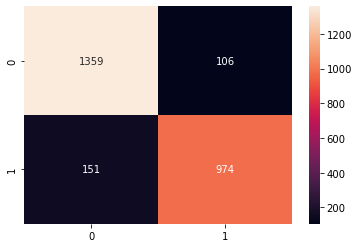

In [20]:
NB_model = CategoricalNB(alpha = 3)

NB_model.fit(x_train, y_train)

y_pred_nb = NB_model.predict(x_test)

recall = sklearn.metrics.recall_score(y_test,y_pred_nb)
precision = sklearn.metrics.precision_score(y_test, y_pred_nb)
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred_nb)
f_measure = sklearn.metrics.f1_score(y_test, y_pred_nb)
print("R: ", recall)
print("P: ", precision)
print("A: ", accuracy)
print("F: ", f_measure)

sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='g')

acc = accuracy_score(y_test, y_pred_nb)
prec = precision_score(y_test, y_pred_nb)
recall = recall_score(y_test, y_pred_nb)
f1 = f1_score(y_test, y_pred_nb)
scores['nb'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
# Ivan

In [28]:
import pickle 

def save_obj(obj, name):
    with open(f'{name}.pkl', 'wb') as outp:
        pickle.dump(obj, outp)
        
def load_obj(name):
    with open(f"{name}.pkl",'r') as file:
        object_file = pickle.load(file)
        return object_file

In [29]:
save_obj(scores, "scores")
test = load_obj("scores")
print(test)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte

**Categorical Naive Bayes**

The categorical Naive Bayes model works using the Bayes Theorem, which assumes that individual features are independent on each other, which works well with our dataset, as we can see through our correlation matrix that none of our features are very correlated. Applying the Bayes Theorem assigns a probability to each feature in the dataset, then uses those probabilities to predict a whole outcome. The categorical Native Bayes model works best for categorical data, which works well with our dataset, as we have a lot of categorical data in the form of 1\-5 ratings for the airline's performance.



In [35]:
#Neural_model = MLPClassifier(solver='lbfgs', alpha=0.1, hidden_layer_sizes=(20, 20), random_state=1)

#Neural_model.fit(x_train, y_train)

#Neural_hat = Neural_model.predict(x_test)

#precision = sklearn.metrics.precision_score(y_test, Neural_hat)
#accuracy = sklearn.metrics.accuracy_score(y_test, Neural_hat)
#print("P: ", precision)
#print("A: ", accuracy)

#sns.heatmap(confusion_matrix(y_test, Neural_hat), annot=True, fmt='g')

R:  0.9422222222222222
P:  0.9422222222222222
A:  0.9498069498069498
F:  0.9422222222222222


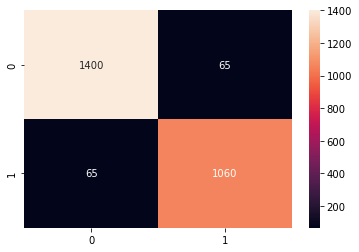

In [32]:
RF_model = RandomForestClassifier() # n_estimators=30, criterion="entropy"

RF_model.fit(x_train, y_train)

y_pred_rf = RF_model.predict(x_test)

recall = sklearn.metrics.recall_score(y_test, y_pred_rf)
precision = sklearn.metrics.precision_score(y_test, y_pred_rf)
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred_rf)
f_measure = sklearn.metrics.f1_score(y_test, y_pred_rf)
print("R: ", recall)
print("P: ", precision)
print("A: ", accuracy)
print("F: ", f_measure)

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='g')


acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
scores['rf'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}

In [33]:
scores

{'sgd': {'accuracy': 0.6791505791505792,
  'precision': 0.5888754534461911,
  'recall': 0.8657777777777778,
  'f1_score': 0.7009715725080965},
 'sgd grid': {'accuracy': 0.8555984555984556,
  'precision': 0.8499534016775396,
  'recall': 0.8106666666666666,
  'f1_score': 0.8298453139217471},
 'nb': {'accuracy': 0.9007722007722008,
  'precision': 0.9018518518518519,
  'recall': 0.8657777777777778,
  'f1_score': 0.8834467120181406},
 'rf': {'accuracy': 0.9498069498069498,
  'precision': 0.9422222222222222,
  'recall': 0.9422222222222222,
  'f1_score': 0.9422222222222222}}

**Random Forest**

A random forest is a model that makes a given number of randomized decision trees and uses them to make predictions on the data by using averaging functions to combine its results from several decision trees, making a more accurate/realistic prediction. Randomizing decision trees allows the model to individually look for correlations between sections of the dataset, making predictions more intuitive, compared to looking at the entire dataset through one decision tree, where it is harder to find patterns when there are so many variables to consider. It then takes the accuracy of the models it makes and displays them on the heatmap so that we can see how accurate/precise the model is. Through some light hyperparameter tuning, we found that at around 20 decision trees, there was no more improvement in the performance of the model and subsequent additions to the amount of decision trees would just increase the processing time. There were also no differences in accuracy/precision when we tried different criterion such as "entropy" and "log\_loss", so we decided that "gini", the default criterion, was good enough for the model.

- What are the pros and cons of the random forest
- [https://towardsdatascience.com/hyperparameter\-tuning\-the\-random\-forest\-in\-python\-using\-scikit\-learn\-28d2aa77dd74](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)



In [34]:
tree_clf = DecisionTreeClassifier()
tree_clf = tree_clf.fit(x_train, y_train)
y_pred_tree = tree_clf.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree))
print("Recall:", recall_score(y_test, y_pred_tree))
print("F1 Score:", f1_score(y_test, y_pred_tree))

acc = accuracy_score(y_test, y_pred_tree)
prec = precision_score(y_test, y_pred_tree)
recall = recall_score(y_test, y_pred_tree)
f1 = f1_score(y_test, y_pred_tree)
scores['tree'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}

Accuracy: 0.9293436293436294
Precision: 0.9109947643979057
Recall: 0.928
F1 Score: 0.9194187582562747


/projects/72aec78b-4035-4aa5-8faa-4d7af1533e7b/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
27750 fits failed out of a total of 31500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5250 fits failed with the following error:
Traceback (most recent call last):
  File "/projects/72aec78b-4035-4aa5-8faa-4d7af1533e7b/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/projects/72aec78b-4035-4aa5-8faa-4d7af1533e7b/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 969, in fit
    super().fit(
  File "/projects/72aec78b-4035-4aa5-8faa-4d7af1533e7b/.local/lib/python3

Accuracy: 0.9158301158301159
Precision: 0.9126478616924477
Recall: 0.8915555555555555
F1 Score: 0.9019784172661871


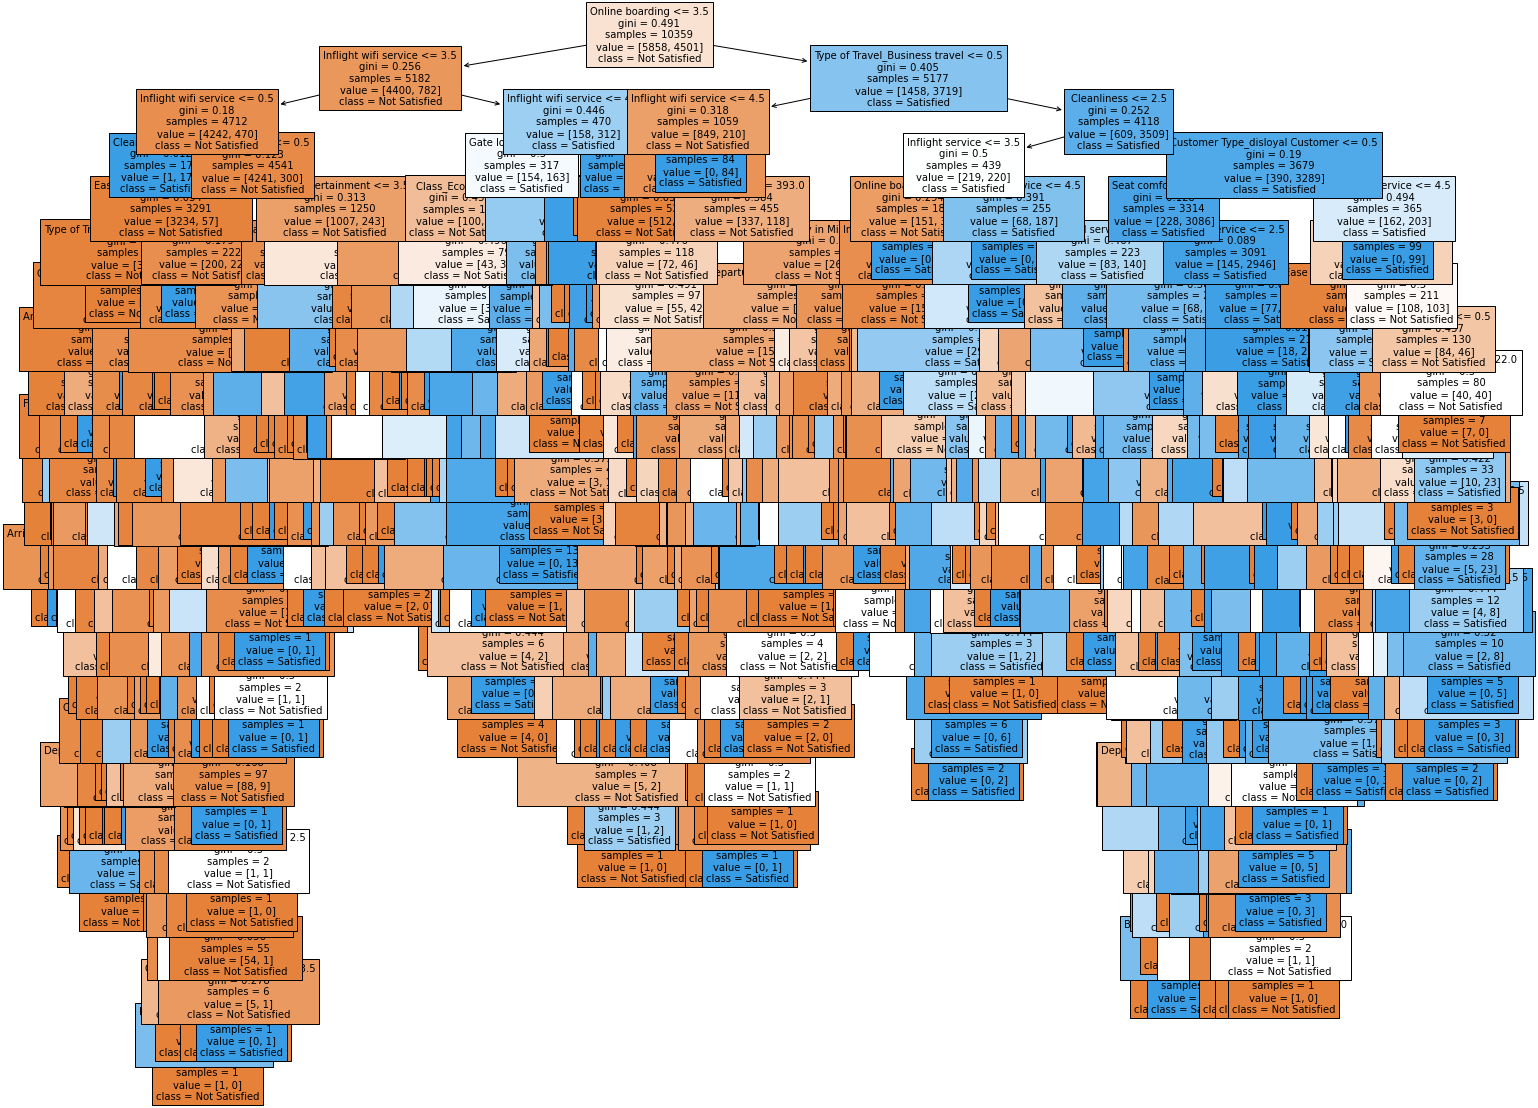

In [35]:



params = {'min_samples_split': list(range(1,7)), 'min_samples_leaf': list(range(1,7)), 'min_weight_fraction_leaf': [-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0], 'max_depth': list(range(1,6)), 'ccp_alpha': [0,0,1.0,2.0,3.0]}
tree_gsearch = GSearch(DecisionTreeClassifier(max_depth=7), params)
tree_gsearch.fit(x_train, y_train)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_clf,
                   feature_names=input_columns.columns,  
                   class_names=['Not Satisfied','Satisfied'],
                   filled=True, fontsize=10)

best_estimator = tree_gsearch.best_estimator_
y_pred_tree = best_estimator.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree))
print("Recall:", recall_score(y_test, y_pred_tree))
print("F1 Score:", f1_score(y_test, y_pred_tree))
acc = accuracy_score(y_test, y_pred_tree)
prec = precision_score(y_test, y_pred_tree)
recall = recall_score(y_test, y_pred_tree)
f1 = f1_score(y_test, y_pred_tree)
scores['tree grid'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}

In [36]:
print(scores)

{'sgd': {'accuracy': 0.6791505791505792, 'precision': 0.5888754534461911, 'recall': 0.8657777777777778, 'f1_score': 0.7009715725080965}, 'sgd grid': {'accuracy': 0.8555984555984556, 'precision': 0.8499534016775396, 'recall': 0.8106666666666666, 'f1_score': 0.8298453139217471}, 'nb': {'accuracy': 0.9007722007722008, 'precision': 0.9018518518518519, 'recall': 0.8657777777777778, 'f1_score': 0.8834467120181406}, 'rf': {'accuracy': 0.9498069498069498, 'precision': 0.9422222222222222, 'recall': 0.9422222222222222, 'f1_score': 0.9422222222222222}, 'tree': {'accuracy': 0.9293436293436294, 'precision': 0.9109947643979057, 'recall': 0.928, 'f1_score': 0.9194187582562747}, 'tree grid': {'accuracy': 0.9158301158301159, 'precision': 0.9126478616924477, 'recall': 0.8915555555555555, 'f1_score': 0.9019784172661871}}


**Decision Tree:**

A decision tree is a graph that classifies items and whether it is true or false to the question in the box. In this example, we use satisfied for true and false for dissatisfied.



P:  0.7256364823277068
A:  0.7518727314850567


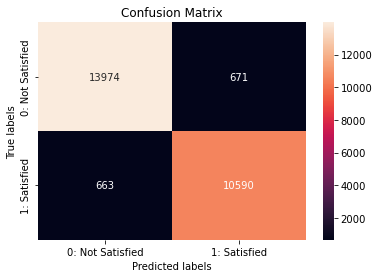

In [83]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0: Not Satisfied', '1: Satisfied',]); ax.yaxis.set_ticklabels(['0: Not Satisfied', '1: Satisfied'])

print("P: ", precision)
print("A: ", accuracy)

a Decision Tree Classifier makes various questions to help determine what group a variable falls into. it goes from the top, and depending on how a question is answered it goes down a path to a different leaf in the tree. It goes all the way down and at the end it puts that variable into a group

- What is a splitting criteron
- What are the pros and cons?
- 



In [16]:
tree_clf = DecisionTreeClassifier()


In [17]:
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier()

AdaBoostClassifier()

**Adaboost**

Short for adaptive boosting, Adaboost takes combines models together to create the best model possible. It takes a bunch of weak learners and combines them into strong learners. It takes a number of desicion trees during the data training period. As the first model is made the incorrect values are the input for the next model to be made.


In [37]:

adc_clf = ADC()
adc_clf.fit(x_train, y_train)
y_pred_adc = adc_clf.predict(x_test)
acc = accuracy_score(y_test, y_pred_adc)
prec = precision_score(y_test, y_pred_adc)
recall = recall_score(y_test, y_pred_adc)
f1 = f1_score(y_test, y_pred_adc)
scores['adc'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}

P:  0.971309578898658
A:  0.9582979380647154


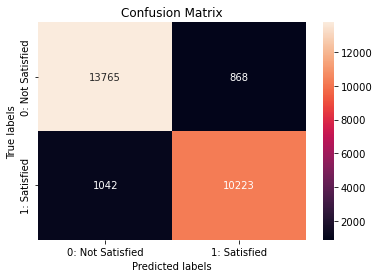

In [20]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, adc_pred), annot=True, fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0: Not Satisfied', '1: Satisfied',]); ax.yaxis.set_ticklabels(['0: Not Satisfied', '1: Satisfied'])

print("P: ", precision)
print("A: ", accuracy)

# Sebastian 

In [21]:
total_squared_error = (np.sum((y_test - adc_pred)**2))
mean_squared_error = total_squared_error/len(y_test)
print(mean_squared_error)

0.07375086879295699


/projects/72aec78b-4035-4aa5-8faa-4d7af1533e7b/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:

lr_clf = LR()
lr_clf.fit(x_train, y_train)
lr_pred=lr_clf.predict(x_test)

y_pred_lr = lr_clf.predict(x_test)
acc = accuracy_score(y_test, y_pred_lr)
prec = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
scores['lr'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}

/projects/72aec78b-4035-4aa5-8faa-4d7af1533e7b/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
scores

{'sgd': {'accuracy': 0.6791505791505792,
  'precision': 0.5888754534461911,
  'recall': 0.8657777777777778,
  'f1_score': 0.7009715725080965},
 'sgd grid': {'accuracy': 0.8555984555984556,
  'precision': 0.8499534016775396,
  'recall': 0.8106666666666666,
  'f1_score': 0.8298453139217471},
 'nb': {'accuracy': 0.9007722007722008,
  'precision': 0.9018518518518519,
  'recall': 0.8657777777777778,
  'f1_score': 0.8834467120181406},
 'rf': {'accuracy': 0.9498069498069498,
  'precision': 0.9422222222222222,
  'recall': 0.9422222222222222,
  'f1_score': 0.9422222222222222},
 'tree': {'accuracy': 0.9293436293436294,
  'precision': 0.9109947643979057,
  'recall': 0.928,
  'f1_score': 0.9194187582562747},
 'tree grid': {'accuracy': 0.9158301158301159,
  'precision': 0.9126478616924477,
  'recall': 0.8915555555555555,
  'f1_score': 0.9019784172661871},
 'adc': {'accuracy': 0.9351351351351351,
  'precision': 0.9215859030837005,
  'recall': 0.9297777777777778,
  'f1_score': 0.9256637168141593},
 '

R:  0.7779849090102086
P:  0.7825
A:  0.8093675187273148
F:  0.7802359225461828


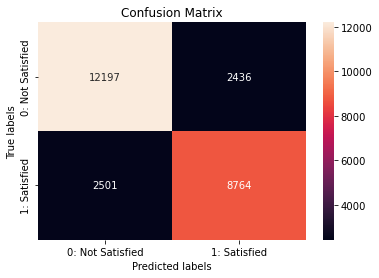

In [25]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0: Not Satisfied', '1: Satisfied',]); ax.yaxis.set_ticklabels(['0: Not Satisfied', '1: Satisfied'])

recall = sklearn.metrics.recall_score(y_test, lr_pred)
precision = sklearn.metrics.precision_score(y_test, lr_pred)
accuracy = sklearn.metrics.accuracy_score(y_test, lr_pred)
f_measure = sklearn.metrics.f1_score(y_test, lr_pred)
print("R: ", recall)
print("P: ", precision)
print("A: ", accuracy)
print("F: ", f_measure)


# Sebastian 

<u>What is a KNN:</u>

A KNN is a classification model and can be used for both supervised and unsupervised machine learning. KNN works by finding the distance between a query and all the examples in the data. K is then used to select the number of examples closest to the query. the KNN then votes for the most frequent label. 

- - [https://towardsdatascience.com/machine\-learning\-basics\-with\-the\-k\-nearest\-neighbors\-algorithm\-6a6e71d01761](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761)
- What does the K mean?
  - [https://towardsdatascience.com/a\-simple\-introduction\-to\-k\-nearest\-neighbors\-algorithm\-b3519ed98e](https://towardsdatascience.com/a-simple-introduction-to-k-nearest-neighbors-algorithm-b3519ed98e)
  - K means a parameter that shows the number of nearest neighbors. This is necessary for the voting process.

Grid search:

[https://scikit\-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

[https://medium.com/@erikgreenj/k\-neighbors\-classifier\-with\-gridsearchcv\-basics\-3c445ddeb657](https://medium.com/@erikgreenj/k-neighbors-classifier-with-gridsearchcv-basics-3c445ddeb657)



R:  0.5751111111111111
P:  0.6293774319066148
A:  0.6683397683397684
F:  0.6010218300046447


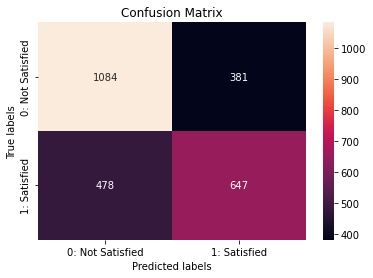

In [42]:
knn_clf = KNN()
knn_clf.fit(x_train, y_train)
knn_pred = knn_clf.predict(x_test)
y_pred_knn = knn_clf.predict(x_test)

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0: Not Satisfied', '1: Satisfied',]); ax.yaxis.set_ticklabels(['0: Not Satisfied', '1: Satisfied'])

recall = sklearn.metrics.recall_score(y_test, knn_pred)
precision = sklearn.metrics.precision_score(y_test, knn_pred)
accuracy = sklearn.metrics.accuracy_score(y_test, knn_pred)
f_measure = sklearn.metrics.f1_score(y_test, knn_pred)
print("R: ", recall)
print("P: ", precision)
print("A: ", accuracy)
print("F: ", f_measure)

y_pred_lr = knn_clf.predict(x_test)
acc = accuracy_score(y_test, y_pred_knn)
prec = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
scores['knn'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
# Sebastian 

In [44]:
grid_params = {'n_neighbors':[1,2,3,4,5,6,7], 'leaf_size':[45] , 'p' :[4] }

gs = GSearch(KNN(), grid_params)
gs.fit(x_train, y_train)

best_estimator = gs.best_estimator_
y_pred_knn = best_estimator.predict(x_test)
acc = accuracy_score(y_test, y_pred_knn)
prec = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
scores['knn_grid'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}


KeyboardInterrupt: 

In [45]:
scores

{'sgd': {'accuracy': 0.6791505791505792,
  'precision': 0.5888754534461911,
  'recall': 0.8657777777777778,
  'f1_score': 0.7009715725080965},
 'sgd grid': {'accuracy': 0.8555984555984556,
  'precision': 0.8499534016775396,
  'recall': 0.8106666666666666,
  'f1_score': 0.8298453139217471},
 'nb': {'accuracy': 0.9007722007722008,
  'precision': 0.9018518518518519,
  'recall': 0.8657777777777778,
  'f1_score': 0.8834467120181406},
 'rf': {'accuracy': 0.9498069498069498,
  'precision': 0.9422222222222222,
  'recall': 0.9422222222222222,
  'f1_score': 0.9422222222222222},
 'tree': {'accuracy': 0.9293436293436294,
  'precision': 0.9109947643979057,
  'recall': 0.928,
  'f1_score': 0.9194187582562747},
 'tree grid': {'accuracy': 0.9158301158301159,
  'precision': 0.9126478616924477,
  'recall': 0.8915555555555555,
  'f1_score': 0.9019784172661871},
 'adc': {'accuracy': 0.9351351351351351,
  'precision': 0.9215859030837005,
  'recall': 0.9297777777777778,
  'f1_score': 0.9256637168141593},
 '

In [49]:
scores['metrics'] = {'accuracy': 'accuracy', 'precision':'precision', 'recall':'recall', 'f1_score':'f1_score'}
scores_df = pd.DataFrame(scores)

In [51]:
list(scores.keys())

['sgd',
 'sgd grid',
 'nb',
 'rf',
 'tree',
 'tree grid',
 'adc',
 'lr',
 'knn',
 'metrics']

In [31]:
#svc.fit(x_train, y_train)
#svc_pred = svc.pred(x_test, y_test)

In [52]:
scores_df = pd.DataFrame(scores)
scores_df = scores_df[['metrics', 'sgd',
 'sgd grid',
 'nb',
 'rf',
 'tree',
 'tree grid',
 'adc',
 'lr',
 'knn']]
scores_df = round(scores_df, 2)

data = []
for column in scores_df.columns:
    data.append(scores_df[column].tolist())
fig = go.Figure(data=[go.Table(header=dict(values=list(scores_df.columns)),
                 cells=dict(values=data))
                     ])
fig.show()



In [53]:
fig.write_html("scores.html")

<u>Models to make:</u>

- knn
- decision tree
- Random forest
- SVC \(DON'T DO THIS ONE YET\)
- Logistic regression 
- Adaboost 
- 

Scoring me
trics:

- f1 score
- Recall
- Precision 
- Accuracy

